In [18]:
import pandas as pd
data=pd.read_csv('test.csv')
data

,x,y
0,7,9.542324
1,88,92.519705
2,88,87.667042
3,65,64.096606
4,19,17.902133
...,...,...
999995,44,43.526669
999996,87,88.657287
999997,10,5.657638
999998,92,84.304019


In [22]:
import csv
from sklearn.model_selection import train_test_split
def linear_regression(x, y):
    n = len(x)
    sum_x = sum(x)
    sum_y = sum(y)
    sum_xy = sum(x_i * y_i for x_i, y_i in zip(x, y))
    sum_x2 = sum(x_i**2 for x_i in x)

    # Slope (m) and Intercept (b)
    m = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)
    b = (sum_y - m * sum_x) / n
    return m, b

def predict(x, m, b):
    return [m * x_i + b for x_i in x]

def mean_squared_error(y_true, y_pred):
    return sum((y_t - y_p)**2 for y_t, y_p in zip(y_true, y_pred)) / len(y_true)

# Load real dataset from CSV
def load_dataset(filepath):
    x, y = [], []
    with open(filepath, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip header row if any
        for row in reader:
            x.append(float(row[0]))  # Years of Experience
            y.append(float(row[1]))  # Salary
    return x, y

# Split the data into train and test sets
def split_data(x, y, test_size=0.2):
    return train_test_split(x, y, test_size=test_size, random_state=42)

dataset_path = "test.csv"
x, y = load_dataset(dataset_path)

# Split the dataset
x_train, x_test, y_train, y_test = split_data(x, y)

# Train the model using the training set
m, b = linear_regression(x_train, y_train)
print(f"Slope (m): {m}")
print(f"Intercept (b): {b}")

# Predict on the test set
predictions = predict(x_test, m, b)

# Create a DataFrame for test set, predictions, and actual labels
df = pd.DataFrame({
    "Test Set (x)": x_test,
    "Actual Labels (y)": y_test,
    "Predictions": predictions
})

print("\nTest Set, Predictions, and Actual Labels:")
print(df)

# Evaluate the model using the test set
mse = mean_squared_error(y_test, predictions)
print(f"\nMean Squared Error on Test Set: {mse}")

Slope (m): 1.0000012711995447
Intercept (b): -0.0008879031505901366

Test Set, Predictions, and Actual Labels:
        Test Set (x)  Actual Labels (y)  Predictions
0               86.0          86.799992    85.999221
1               48.0          46.395593    47.999173
2               81.0          78.213789    80.999215
3               45.0          47.025158    44.999169
4               65.0          60.183043    64.999195
...              ...                ...          ...
199995           9.0           5.676652     8.999124
199996          23.0          21.367387    22.999141
199997          42.0          41.578086    41.999165
199998          10.0           8.410292     9.999125
199999         100.0         100.681268    99.999239

[200000 rows x 3 columns]

Mean Squared Error on Test Set: 8.999943649154915


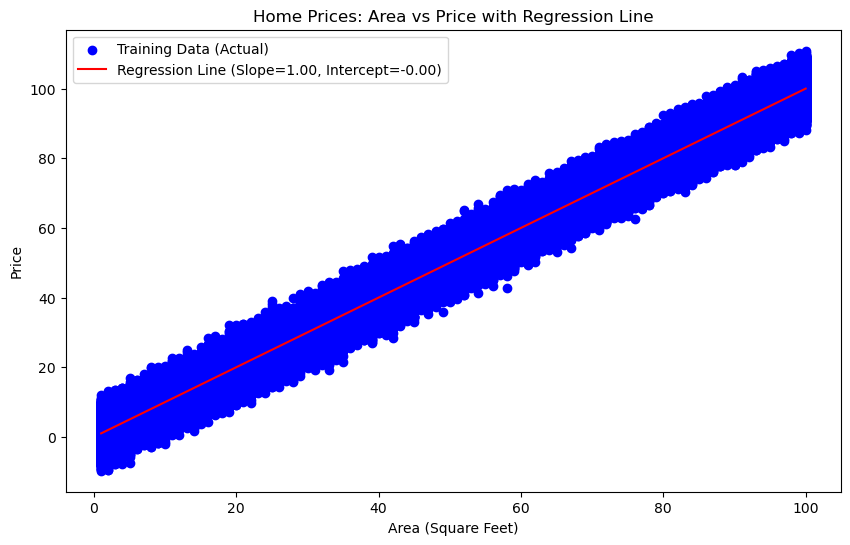

In [24]:
import matplotlib.pyplot as plt

# Generate regression line points
x_line = sorted(x)  # Sort x values for a smooth regression line
y_line = [m * x_i + b for x_i in x_line]

# Visualization
plt.figure(figsize=(10, 6))

# Plot training data
plt.scatter(x_train, y_train, color='blue', label='Training Data (Actual)')

# Plot test data
#plt.scatter(x_test, y_test, color='green', label='Test Data (Actual)')

# Plot regression line
plt.plot(x_line, y_line, color='red', label=f'Regression Line (Slope={m:.2f}, Intercept={b:.2f})')

# Add labels, title, and legend
plt.title('Home Prices: Area vs Price with Regression Line')
plt.xlabel('Area (Square Feet)')
plt.ylabel('Price')
plt.legend()


# Show the plot
plt.show()
